# IDEA RUSSELL 2000: 

#### This idea was taken from web which gives free trading strategies ideas, specifically the "quantitative" ones, the link which I get the idea is the following one: https://www.quantifiedstrategies.com/quantitative-trading-strategies/

#### The strategy says the following:     
*Buy on the close of the first trading day after the 23rd of June.
Sell on the close on the first trading day of July.*


## 1. Import the libraries:

In [1]:
import backtrader as bt
import backtrader.feeds as btfeeds
import yfinance as yf
import calendar
import datetime

from datetime import date, timedelta
from datetime import datetime

## 2. Define the strategy

In [2]:

class BuyCertainDays(bt.Strategy):

    def __init__(self):
        self.dataclose = self.data.close
        self.bought = False

    def next(self):
        # Check if it's the first trading day after the 23rd of June
        if self.data.datetime.datetime().month == 6 and \
                self.data.datetime.datetime().day >= 24 and \
                not self.bought:
            self.buy()
            self.bought = True

        # Check if it's the first trading day of July
        if self.data.datetime.datetime().month == 7 and \
                self.bought:
            self.sell()
            self.bought = False


## 3. Create cerebro & run backtest

In [3]:

if __name__ == '__main__':
    cerebro = bt.Cerebro()
    
    yf_data = yf.download('^RUT', start=datetime(2015, 1, 1), end=datetime(2023, 8, 10))
    data = bt.feeds.PandasData(dataname=yf_data)
    
    cerebro.adddata(data)

    cerebro.addstrategy(BuyCertainDays)

    starting_cash = 10000
    cerebro.broker.set_cash(starting_cash)
    cerebro.broker.setcommission(commission=0.001)  # 0.1% commission

    print(f"Starting Portfolio Value: {cerebro.broker.getvalue():.2f}")

    cerebro.run()

    print(f"Ending Portfolio Value: {cerebro.broker.getvalue():.2f}")


[*********************100%***********************]  1 of 1 completed
Starting Portfolio Value: 10000.00
Ending Portfolio Value: 10066.17


## Results:

<IPython.core.display.Javascript object>


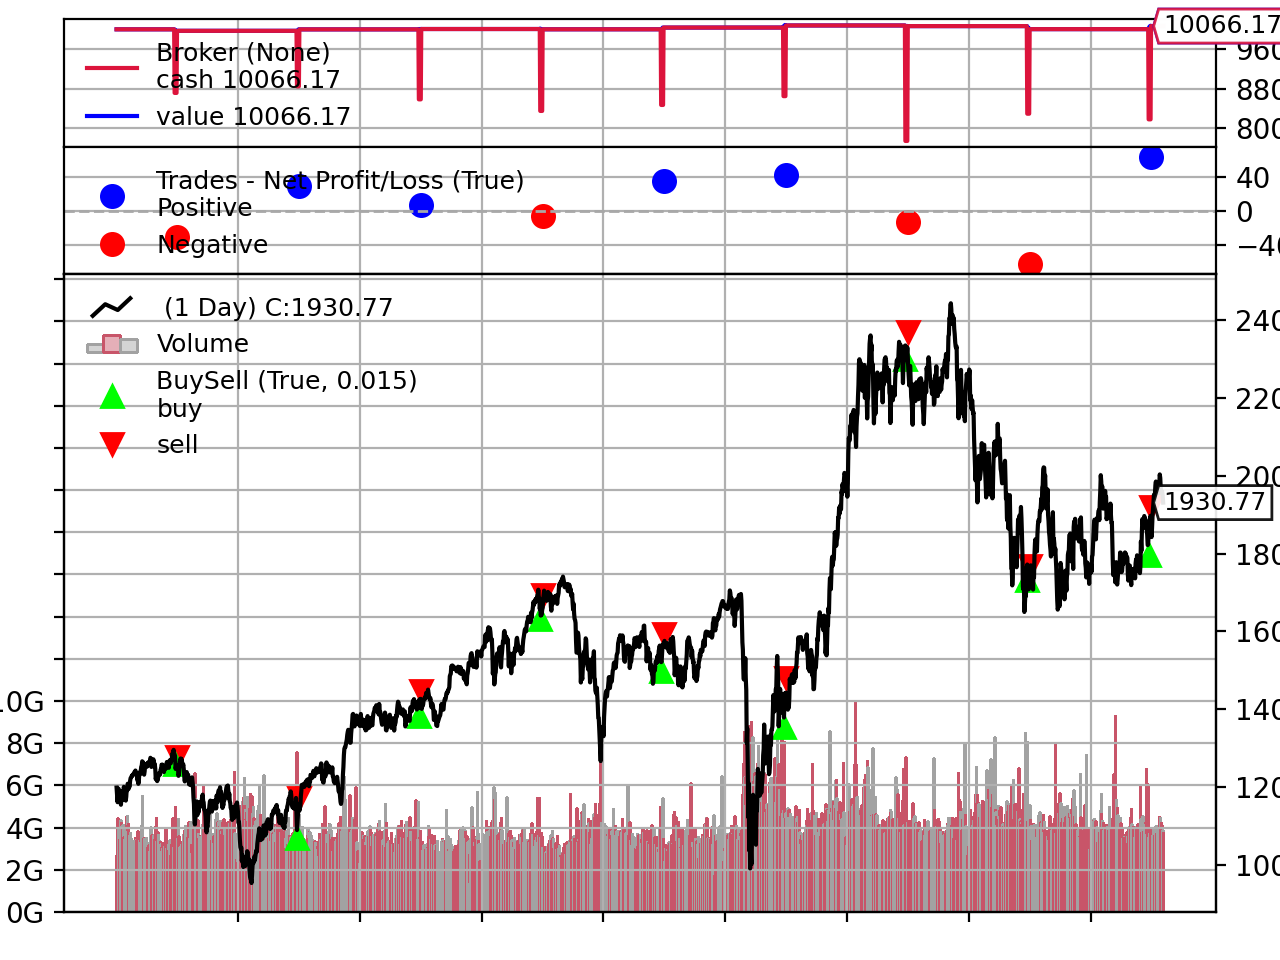

[[<Figure size 640x480 with 4 Axes>]]

In [4]:
cerebro.plot()

### Getting some basic annalysis:

In [5]:
annalize = cerebro.run()

In [6]:
for strat in annalize:
    print(f"Final Portfolio Value: {strat.broker.getvalue():.2f}")
    print(f"Total Return: {strat.broker.getvalue() - starting_cash:.2f}")
    print(f"Annualized Return: {(strat.broker.getvalue() / starting_cash) ** (252 / len(data)) - 1:.2%}")

Final Portfolio Value: 10066.17
Total Return: 66.17
Annualized Return: 0.08%


## Conclusion:

As we can see, this strategy doesn't seems to have a competitive advantadge against other possible strategies giving a result after commisions close to breakeven (without taking into account the inflation).